# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In the entrance exam, we asked you to implement a K-NN classifier to classify some tiny images extracted from CIFAR-10 dataset. Probably many of you noticed that the performances were quite bad. In this problem, you are going to implement a basic multi-layer fully connected neural network to perform the same classification task.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own.

In [2]:
from __future__ import print_function
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading the data (CIFAR-10)
Run the following code block to load in the properly splitted CIFAR-10 data.

In [3]:
data = CIFAR10_data()
for k, v in list(data.items()):
    print ("Name: {} Shape: {}".format(k, v.shape))

Name: data_train Shape: (49000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: data_val Shape: (1000, 3, 32, 32)
Name: labels_val Shape: (1000,)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_test Shape: (1000,)


## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network. Please refer to the file layer_utils.py under the directory lib. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward
In the class skeleton "fc", please complete the forward pass in function "forward", the input to the fc layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. Make sure that you handle this dimensionality issue. 

In [4]:
# Test the fc forward function
input_bz = 3
input_dim = (6, 5, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.5, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(x)

correct_out = np.array([[0.70157129, 0.83483484, 0.96809839, 1.10136194],
                        [1.86723094, 2.02561647, 2.18400199, 2.34238752],
                        [3.0328906,  3.2163981,  3.3999056,  3.5834131]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

Difference:  2.48539291792e-09


## FC Backward
Please complete the function "backward" as the backward pass of the fc layer. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [5]:
# Test the fc backward function
x = np.random.randn(10, 2, 2, 3)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(10, 10)

single_fc = fc(np.prod(x.shape[1:]), 10, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]

# dx_num = dx_num.reshape((-1, np.prod(x.shape[1:]))) # If I can add this row?
# print(dx.shape)
# print(dx_num.shape)
# print(db.shape)
# print(db_num.shape)
# The error should be around 1e-10
print ("dx Error: ", rel_error(dx_num, dx))
print ("dw Error: ", rel_error(dw_num, dw))
print ("db Error: ", rel_error(db_num, db))

dx Error:  1.16035621679e-09
dw Error:  4.14176587063e-10
db Error:  2.49406443155e-11


## ReLU Forward
In the class skeleton "relu", please complete the forward pass.

In [6]:
# Test the relu forward function
x = np.linspace(-1.0, 1.0, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")
print(x)
print(x.shape)
out = relu_f.forward(x)
correct_out = np.array([[0.,          0.,        0.,         0.        ],
                        [0.,          0.,        0.09090909, 0.27272727],
                        [0.45454545, 0.63636364, 0.81818182, 1.        ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print ("Difference: ", rel_error(out, correct_out))

[[-1.         -0.81818182 -0.63636364 -0.45454545]
 [-0.27272727 -0.09090909  0.09090909  0.27272727]
 [ 0.45454545  0.63636364  0.81818182  1.        ]]
(3, 4)
Difference:  5.00000005012e-09


## ReLU Backward
Please complete the backward pass of the class relu.

In [7]:
# Test the relu backward function
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print ("dx Error: ", rel_error(dx_num, dx))

dx Error:  3.27558620272e-12


## Dropout Forward
In the class "dropout", please complete the forward pass. Remember that the dropout is only applied during training phase, you should pay attention to this while implementing the function.

In [8]:
x = np.random.randn(100, 100) + 5.0

print ("----------------------------------------------------------------")
for p in [0.25, 0.50, 0.75]:
    dropout_f = dropout(p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print ("Dropout p = ", p)
    print ("Mean of input: ", x.mean())
    print ("Mean of output during training time: ", out.mean())
    print ("Mean of output during testing time: ", out_test.mean())
    print ("Fraction of output set to zero during training time: ", (out == 0).mean())
    print ("Fraction of output set to zero during testing time: ", (out_test == 0).mean())
    print ("----------------------------------------------------------------")

----------------------------------------------------------------
Dropout p =  0.25
Mean of input:  5.0077937988
Mean of output during training time:  3.74153175715
Mean of output during testing time:  5.0077937988
Fraction of output set to zero during training time:  0.2526
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout p =  0.5
Mean of input:  5.0077937988
Mean of output during training time:  2.47956443573
Mean of output during testing time:  5.0077937988
Fraction of output set to zero during training time:  0.504
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout p =  0.75
Mean of input:  5.0077937988
Mean of output during training time:  1.23506705549
Mean of output during testing time:  5.0077937988
Fraction of output set to zero during training time:  0.7512
Fraction of output set to zero during testing time:  0.0
------

## Dropout Backward
Please complete the backward pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [9]:
x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

p = 0.75
dropout_b = dropout(p, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print ('dx relative error: ', rel_error(dx, dx_num))

dx relative error:  1.89289277416e-11


## Testing cascaded layers: FC + ReLU
Please find the TestFCReLU function in fully_conn.py under lib directory. <br />
You only need to complete few lines of code in the TODO block. <br />
Please design an FC --> ReLU two-layer-mini-network where the parameters of them match the given x, w, and b <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the _w, and _b are automatically assigned during network setup 

In [10]:
x = np.random.randn(2, 3, 4)  # the input features
w = np.random.randn(12, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(2, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

# tiny_net.net.assign("param_name_w", w)
# tiny_net.net.assign("param_name_b", b)
tiny_net.net.assign("fc_w", w)
tiny_net.net.assign("fc_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

dw = tiny_net.net.get_grads("fc_w")
db = tiny_net.net.get_grads("fc_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print ("dx error: ", rel_error(dx_num, dx))
print ("dw error: ", rel_error(dw_num, dw))
print ("db error: ", rel_error(db_num, db))

dx error:  1.13598437673e-10
dw error:  1.14872404377e-10
db error:  3.27562531714e-12


## SoftMax Function and Loss Layer
In the layer_utils.py, please first complete the function softmax, which will be use in the function cross_entropy. Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [11]:
num_classes, num_inputs = 5, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)
# print(y)
# print(x.shape)
# print(y.shape)
# print(y.size)
test_loss = cross_entropy()
loss = test_loss.forward(x, y)
# print("loss")
# print("loss")
dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.609
# and dx error should be at the scale of 1e-8 (or smaller)
print ("Cross Entropy Loss: ", loss)
print ("dx error: ", rel_error(dx_num, dx))

Cross Entropy Loss:  1.60945846468
dx error:  3.28599046685e-09


## Test a Small Fully Connected Network
Please find the SmallFullyConnectedNetwork function in fully_conn.py under lib directory. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an FC --> ReLU --> FC --> ReLU network where the shapes of parameters match the given shapes <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the _w, and _b are automatically assigned during network setup 

In [12]:
model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print ("Testing initialization ... ")
w1_std = abs(model.net.get_params("fc1_w").std() - std)
print('w1std')
print(w1_std)
b1 = model.net.get_params("fc1_b").std()
w2_std = abs(model.net.get_params("fc2_w").std() - std)
b2 = model.net.get_params("fc2_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print ("Passed!")

print ("Testing test-time forward pass ... ")
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

model.net.assign("fc1_w", w1)
model.net.assign("fc1_b", b1)
model.net.assign("fc2_w", w2)
model.net.assign("fc2_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the loss ...",)
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print ("Passed!")

print ("Testing the gradients (error should be no larger than 1e-7) ...")
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print ('%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name])))

Testing initialization ... 
w1std
0.000343323975335
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ...
Passed!
Testing the gradients (error should be no larger than 1e-7) ...
fc1_b relative error: 2.85e-09
fc1_w relative error: 8.75e-09
fc2_b relative error: 6.71e-08
fc2_w relative error: 2.59e-09


## Test a Fully Connected Network regularized with Dropout
Please find the DropoutNet function in fully_conn.py under lib directory. <br />
For this part you don't need to design a new network, just simply run the following test code <br />
If something goes wrong, you might want to double check your dropout implementation

In [13]:
N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))
seed = 123

for dropout_p in [0., 0.25, 0.5]:
    print ("Dropout p =", dropout_p)
    model = DropoutNet(dropout_p=dropout_p, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads
    print ("Loss (should be ~2.30) : ", loss)

    print ("Error of gradients should be no larger than 1e-5")
    for name in sorted(model.net.params):
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print ("{} relative error: {}".format(name, rel_error(grad_num, grads[name])))
    print

Dropout p = 0.0
Loss (should be ~2.30) :  2.30285163514
Error of gradients should be no larger than 1e-5
fc1_b relative error: 3.86706745047462e-08
fc1_w relative error: 1.6842808381819982e-06
fc2_b relative error: 3.812098660929502e-09
fc2_w relative error: 2.2678596223853193e-06
fc3_b relative error: 1.524817329248913e-10
fc3_w relative error: 1.169622219539072e-07
Dropout p = 0.25
Loss (should be ~2.30) :  2.30217644162
Error of gradients should be no larger than 1e-5
fc1_b relative error: 6.475101867894039e-08
fc1_w relative error: 6.062712717230874e-06
fc2_b relative error: 1.508710003974928e-08
fc2_w relative error: 3.811195240195112e-05
fc3_b relative error: 4.200665244051176e-10
fc3_w relative error: 5.871051889990535e-07
Dropout p = 0.5
Loss (should be ~2.30) :  2.30350883178
Error of gradients should be no larger than 1e-5
fc1_b relative error: 1.3676466073508024e-07
fc1_w relative error: 2.8970630397677172e-06
fc2_b relative error: 5.655416664888587e-07
fc2_w relative error:

## Training a Network
In this section, we defined a TinyNet class for you to fill in the TODO block in fully_conn.py.
* Here please design a two layer fully connected network for this part.
* Please read the train.py under lib directory carefully and complete the TODO blocks in the train_net function first.
* In addition, read how the SGD function is implemented in optim.py, you will be asked to complete three other optimization methods in the later sections.

In [14]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}


In [15]:
data_dict['data_train'][0].shape

(49000, 3, 32, 32)

In [16]:
data_dict['data_val'][0].shape

(1000, 3, 32, 32)

In [17]:
data_dict['data_test'][1].shape

(1000,)

In [20]:
model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

### Now train the network to achieve at least 50% validation accuracy

In [19]:
results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################

# Initialize 

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return np.random.normal(scale=xavier_stddev, size=size)
input_dim = 3072
output_dim = 10
hidden_dim = 500

w1 = xavier_init([input_dim, hidden_dim])
w2 = xavier_init([hidden_dim, output_dim])
b1 = np.zeros(hidden_dim)
b2 = np.zeros(output_dim)
print(w1.shape)
print(w2.shape)
print(b1.shape, b2.shape)
model.net.assign("fc1_w", w1)
model.net.assign("fc1_b", b1)
model.net.assign("fc2_w", w2)
model.net.assign("fc2_b", b2)
results = train_net(data_dict, model, loss_f, optimizer, batch_size= 128, max_epochs=100,lr_decay=1, lr_decay_every=1000, show_every=10, verbose=True)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(3072, 500)
(500, 10)
(500,) (10,)
(Iteration 1 / 38200) loss: 136.36642501770802
(Iteration 11 / 38200) loss: 63.19851601119141
(Iteration 21 / 38200) loss: 49.44473834900906
(Iteration 31 / 38200) loss: 52.31316910500976
(Iteration 41 / 38200) loss: 59.0544200078737
(Iteration 51 / 38200) loss: 40.80013706058992
(Iteration 61 / 38200) loss: 40.880085779367484
(Iteration 71 / 38200) loss: 45.29428761301481
(Iteration 81 / 38200) loss: 41.130484671744014
(Iteration 91 / 38200) loss: 42.14524804595368
(Iteration 101 / 38200) loss: 38.36026633168224
(Iteration 111 / 38200) loss: 39.989662674437476
(Iteration 121 / 38200) loss: 49.53309924096267
(Iteration 131 / 38200) loss: 38.43644013425806
(Iteration 141 / 38200) loss: 40.45771545803865
(Iteration 151 / 38200) loss: 31.247732834749712
(Iteration 161 / 38200) loss: 36.1879214121396
(Iteration 171 / 38200) loss: 40.57197590241032
(Iteration 181 / 38200) loss: 35.55337797223917
(Iteration 191 / 38200) loss: 35.59097120403044
(Iteration 20

(Iteration 1611 / 38200) loss: 14.593698729441826
(Iteration 1621 / 38200) loss: 12.427791562882085
(Iteration 1631 / 38200) loss: 13.235327272222861
(Iteration 1641 / 38200) loss: 12.504664826944303
(Iteration 1651 / 38200) loss: 12.51909299396921
(Iteration 1661 / 38200) loss: 14.645675502911317
(Iteration 1671 / 38200) loss: 11.01071422697763
(Iteration 1681 / 38200) loss: 14.16448446460851
(Iteration 1691 / 38200) loss: 11.075117128926728
(Iteration 1701 / 38200) loss: 13.259977427689424
(Iteration 1711 / 38200) loss: 12.967598724509996
(Iteration 1721 / 38200) loss: 12.90375368826296
(Iteration 1731 / 38200) loss: 11.608809804501597
(Iteration 1741 / 38200) loss: 12.159071610399662
(Iteration 1751 / 38200) loss: 10.433371350624935
(Iteration 1761 / 38200) loss: 10.552010672237806
(Iteration 1771 / 38200) loss: 14.368480160195618
(Iteration 1781 / 38200) loss: 12.927227048890956
(Iteration 1791 / 38200) loss: 12.310611784036011
(Iteration 1801 / 38200) loss: 14.57457094849359
(Iter

(Iteration 3211 / 38200) loss: 8.65676903110354
(Iteration 3221 / 38200) loss: 7.394070297935876
(Iteration 3231 / 38200) loss: 8.421822150945895
(Iteration 3241 / 38200) loss: 7.618759445651581
(Iteration 3251 / 38200) loss: 8.547049788734434
(Iteration 3261 / 38200) loss: 7.9265574748916565
(Iteration 3271 / 38200) loss: 7.251950666042838
(Iteration 3281 / 38200) loss: 6.345219252884581
(Iteration 3291 / 38200) loss: 7.915469125995156
(Iteration 3301 / 38200) loss: 5.531892207497753
(Iteration 3311 / 38200) loss: 7.122889342983878
(Iteration 3321 / 38200) loss: 7.4961253172029085
(Iteration 3331 / 38200) loss: 7.951025009288729
(Iteration 3341 / 38200) loss: 8.195691550853951
(Iteration 3351 / 38200) loss: 8.198672240531732
(Iteration 3361 / 38200) loss: 7.066448233658925
(Iteration 3371 / 38200) loss: 7.701774442419731
(Iteration 3381 / 38200) loss: 8.906455911509186
(Iteration 3391 / 38200) loss: 8.506507185160505
(Iteration 3401 / 38200) loss: 9.12600177866846
(Iteration 3411 / 38

(Iteration 4821 / 38200) loss: 5.018439068520378
(Iteration 4831 / 38200) loss: 6.072273541800074
(Iteration 4841 / 38200) loss: 6.183425092039637
(Iteration 4851 / 38200) loss: 5.725127001654512
(Iteration 4861 / 38200) loss: 4.995487462091198
(Iteration 4871 / 38200) loss: 4.66509454790339
(Iteration 4881 / 38200) loss: 5.753021939596559
(Iteration 4891 / 38200) loss: 4.992644891604618
(Iteration 4901 / 38200) loss: 6.6967084433027475
(Iteration 4911 / 38200) loss: 4.988448775415317
(Iteration 4921 / 38200) loss: 4.52312957114127
(Iteration 4931 / 38200) loss: 4.491466312535549
(Iteration 4941 / 38200) loss: 5.899297506704199
(Iteration 4951 / 38200) loss: 5.710592060516266
(Iteration 4961 / 38200) loss: 4.930923571131514
(Epoch 13 / 100) Training Accuracy: 0.545795918367347, Validation Accuracy: 0.397
(Iteration 4971 / 38200) loss: 4.448971007718501
(Iteration 4981 / 38200) loss: 4.124044202912315
(Iteration 4991 / 38200) loss: 5.3926099080462535
(Iteration 5001 / 38200) loss: 5.179

(Iteration 6421 / 38200) loss: 3.672377593227381
(Iteration 6431 / 38200) loss: 3.4935574359932087
(Iteration 6441 / 38200) loss: 4.418762979288422
(Iteration 6451 / 38200) loss: 3.3195516840808734
(Iteration 6461 / 38200) loss: 3.9799511394361655
(Iteration 6471 / 38200) loss: 3.936274139049626
(Iteration 6481 / 38200) loss: 3.687444657235232
(Iteration 6491 / 38200) loss: 3.0244749244416353
(Epoch 17 / 100) Training Accuracy: 0.6073877551020408, Validation Accuracy: 0.423
(Iteration 6501 / 38200) loss: 3.2934085267925166
(Iteration 6511 / 38200) loss: 3.1455308959370383
(Iteration 6521 / 38200) loss: 3.7190641220628846
(Iteration 6531 / 38200) loss: 4.004816785148588
(Iteration 6541 / 38200) loss: 3.594913246361277
(Iteration 6551 / 38200) loss: 3.47441499178038
(Iteration 6561 / 38200) loss: 3.6635418721025763
(Iteration 6571 / 38200) loss: 2.5687024667920344
(Iteration 6581 / 38200) loss: 3.081082547963563
(Iteration 6591 / 38200) loss: 4.603641229455484
(Iteration 6601 / 38200) lo

(Iteration 8011 / 38200) loss: 2.6916176187465473
(Iteration 8021 / 38200) loss: 3.3404772772754034
(Epoch 21 / 100) Training Accuracy: 0.6338775510204082, Validation Accuracy: 0.425
(Iteration 8031 / 38200) loss: 2.1063561248116653
(Iteration 8041 / 38200) loss: 2.5339964750746584
(Iteration 8051 / 38200) loss: 2.1900924900066254
(Iteration 8061 / 38200) loss: 2.4236872896000086
(Iteration 8071 / 38200) loss: 2.937774280386429
(Iteration 8081 / 38200) loss: 2.302428866732159
(Iteration 8091 / 38200) loss: 2.276459824388999
(Iteration 8101 / 38200) loss: 2.8896657413838183
(Iteration 8111 / 38200) loss: 2.040055654624969
(Iteration 8121 / 38200) loss: 3.222965808506015
(Iteration 8131 / 38200) loss: 2.579173423304904
(Iteration 8141 / 38200) loss: 3.497177682263522
(Iteration 8151 / 38200) loss: 2.770640656710607
(Iteration 8161 / 38200) loss: 3.2992247728383415
(Iteration 8171 / 38200) loss: 2.4716302454377077
(Iteration 8181 / 38200) loss: 4.447681287059118
(Iteration 8191 / 38200) l

(Iteration 9591 / 38200) loss: 2.635160988427075
(Iteration 9601 / 38200) loss: 2.3886187258016296
(Iteration 9611 / 38200) loss: 2.1880292048670524
(Iteration 9621 / 38200) loss: 2.2259472576716886
(Iteration 9631 / 38200) loss: 1.8411227836630533
(Iteration 9641 / 38200) loss: 2.466848856157122
(Iteration 9651 / 38200) loss: 2.516100722870328
(Iteration 9661 / 38200) loss: 2.56500443612238
(Iteration 9671 / 38200) loss: 2.1709882812460166
(Iteration 9681 / 38200) loss: 1.701444939294826
(Iteration 9691 / 38200) loss: 2.1709880854351584
(Iteration 9701 / 38200) loss: 2.233171901630392
(Iteration 9711 / 38200) loss: 1.8907763133131668
(Iteration 9721 / 38200) loss: 1.8904130308204878
(Iteration 9731 / 38200) loss: 1.7768040938441017
(Iteration 9741 / 38200) loss: 2.3955678427794522
(Iteration 9751 / 38200) loss: 2.0339666147035134
(Iteration 9761 / 38200) loss: 1.488936474568687
(Iteration 9771 / 38200) loss: 2.31793953385677
(Iteration 9781 / 38200) loss: 2.9169513475262567
(Iteration

(Iteration 11161 / 38200) loss: 1.6847892793462704
(Iteration 11171 / 38200) loss: 1.8928390232816525
(Iteration 11181 / 38200) loss: 1.9497271199072612
(Iteration 11191 / 38200) loss: 1.4394728515753785
(Iteration 11201 / 38200) loss: 1.8243154846378633
(Iteration 11211 / 38200) loss: 1.7776643868023436
(Iteration 11221 / 38200) loss: 1.657102624602723
(Iteration 11231 / 38200) loss: 1.9251152077845672
(Iteration 11241 / 38200) loss: 1.77471720103745
(Iteration 11251 / 38200) loss: 1.8352080161238105
(Iteration 11261 / 38200) loss: 1.725304740688181
(Iteration 11271 / 38200) loss: 2.466968876577484
(Iteration 11281 / 38200) loss: 1.4222497783101131
(Iteration 11291 / 38200) loss: 1.7278597206172104
(Iteration 11301 / 38200) loss: 2.097478732801534
(Iteration 11311 / 38200) loss: 1.7567382287980675
(Iteration 11321 / 38200) loss: 2.0717978774265884
(Iteration 11331 / 38200) loss: 1.332122697971891
(Iteration 11341 / 38200) loss: 2.2804797659349942
(Iteration 11351 / 38200) loss: 1.1828

(Iteration 12721 / 38200) loss: 1.6595620945774456
(Iteration 12731 / 38200) loss: 1.3830556097392004
(Iteration 12741 / 38200) loss: 1.695560251136469
(Iteration 12751 / 38200) loss: 2.0331962191207227
(Iteration 12761 / 38200) loss: 2.338555269243233
(Iteration 12771 / 38200) loss: 0.9895619950873689
(Iteration 12781 / 38200) loss: 1.7593572332958707
(Iteration 12791 / 38200) loss: 1.3709767636536796
(Iteration 12801 / 38200) loss: 1.5724574470341313
(Iteration 12811 / 38200) loss: 1.2619015468244885
(Iteration 12821 / 38200) loss: 1.5494624550247347
(Iteration 12831 / 38200) loss: 1.4295524373465724
(Iteration 12841 / 38200) loss: 1.667661465800467
(Iteration 12851 / 38200) loss: 1.6147772074700293
(Iteration 12861 / 38200) loss: 1.1804009547891994
(Iteration 12871 / 38200) loss: 1.3990597398538964
(Iteration 12881 / 38200) loss: 1.5760442290638417
(Iteration 12891 / 38200) loss: 1.456084884807188
(Iteration 12901 / 38200) loss: 2.110129198871637
(Iteration 12911 / 38200) loss: 2.05

(Iteration 14271 / 38200) loss: 1.1398557122835076
(Iteration 14281 / 38200) loss: 0.831952381848837
(Iteration 14291 / 38200) loss: 1.069889565177089
(Iteration 14301 / 38200) loss: 1.4802112277918336
(Iteration 14311 / 38200) loss: 1.541904742563993
(Iteration 14321 / 38200) loss: 1.5361009298865251
(Iteration 14331 / 38200) loss: 1.695409386044779
(Iteration 14341 / 38200) loss: 0.995340985707573
(Iteration 14351 / 38200) loss: 0.9748722519246298
(Iteration 14361 / 38200) loss: 1.6124655487849269
(Iteration 14371 / 38200) loss: 1.027179025578326
(Iteration 14381 / 38200) loss: 1.3815979131127816
(Iteration 14391 / 38200) loss: 1.446594312486324
(Iteration 14401 / 38200) loss: 1.2936538350901774
(Iteration 14411 / 38200) loss: 1.4721618032331634
(Iteration 14421 / 38200) loss: 1.9754334663725568
(Iteration 14431 / 38200) loss: 1.3046545416659279
(Iteration 14441 / 38200) loss: 1.5604895695375396
(Iteration 14451 / 38200) loss: 1.5391706839927388
(Iteration 14461 / 38200) loss: 1.6345

(Iteration 15821 / 38200) loss: 1.240610082915636
(Iteration 15831 / 38200) loss: 1.845036282001902
(Iteration 15841 / 38200) loss: 1.0284386053725207
(Iteration 15851 / 38200) loss: 1.2942980742743082
(Iteration 15861 / 38200) loss: 1.2902300166130112
(Iteration 15871 / 38200) loss: 1.4181586759947686
(Iteration 15881 / 38200) loss: 0.8246761548996431
(Iteration 15891 / 38200) loss: 1.3141995885844011
(Iteration 15901 / 38200) loss: 1.4471683801527497
(Iteration 15911 / 38200) loss: 1.8563098093660884
(Iteration 15921 / 38200) loss: 1.0846055825721546
(Iteration 15931 / 38200) loss: 1.6827240581176126
(Iteration 15941 / 38200) loss: 1.2697744924809002
(Iteration 15951 / 38200) loss: 1.1651002867693774
(Iteration 15961 / 38200) loss: 1.2691239750060754
(Iteration 15971 / 38200) loss: 1.401619701842852
(Iteration 15981 / 38200) loss: 1.7005968721119018
(Iteration 15991 / 38200) loss: 1.3167466527796998
(Iteration 16001 / 38200) loss: 1.3108039195819599
(Iteration 16011 / 38200) loss: 1.

(Iteration 17371 / 38200) loss: 0.8613622627820484
(Iteration 17381 / 38200) loss: 1.3892391800067108
(Iteration 17391 / 38200) loss: 1.0832448955739808
(Iteration 17401 / 38200) loss: 1.1999206194307117
(Iteration 17411 / 38200) loss: 1.3969031552142603
(Iteration 17421 / 38200) loss: 1.0174111171706035
(Iteration 17431 / 38200) loss: 1.0451166764226643
(Iteration 17441 / 38200) loss: 1.0931685607944148
(Iteration 17451 / 38200) loss: 0.8935759076020888
(Iteration 17461 / 38200) loss: 1.4088145843627535
(Iteration 17471 / 38200) loss: 1.2552419207056067
(Iteration 17481 / 38200) loss: 1.1448794273138758
(Iteration 17491 / 38200) loss: 1.1210009149607694
(Iteration 17501 / 38200) loss: 1.1927238618922698
(Iteration 17511 / 38200) loss: 1.305039498927239
(Iteration 17521 / 38200) loss: 0.8003564705485005
(Iteration 17531 / 38200) loss: 1.6738842096627211
(Iteration 17541 / 38200) loss: 1.2647195311332406
(Iteration 17551 / 38200) loss: 1.1338094902773497
(Iteration 17561 / 38200) loss: 

(Iteration 18921 / 38200) loss: 1.310135576681187
(Iteration 18931 / 38200) loss: 0.7802051011512264
(Iteration 18941 / 38200) loss: 0.9955717560067814
(Iteration 18951 / 38200) loss: 1.2276114560914548
(Iteration 18961 / 38200) loss: 0.7719761638123649
(Iteration 18971 / 38200) loss: 1.0449127353492682
(Iteration 18981 / 38200) loss: 0.9901286555560219
(Iteration 18991 / 38200) loss: 0.9481903881436706
(Iteration 19001 / 38200) loss: 0.9340574600712637
(Iteration 19011 / 38200) loss: 0.9936189472742673
(Iteration 19021 / 38200) loss: 0.809384018751038
(Iteration 19031 / 38200) loss: 0.9829407416254851
(Iteration 19041 / 38200) loss: 1.052154684587415
(Iteration 19051 / 38200) loss: 1.1574924991246858
(Iteration 19061 / 38200) loss: 1.1755452293169886
(Iteration 19071 / 38200) loss: 1.0413295248287202
(Iteration 19081 / 38200) loss: 0.8604256153495993
(Iteration 19091 / 38200) loss: 1.430203009125215
(Epoch 50 / 100) Training Accuracy: 0.7167959183673469, Validation Accuracy: 0.432
(It

(Iteration 20471 / 38200) loss: 0.9720638184178108
(Iteration 20481 / 38200) loss: 0.8068141930607987
(Iteration 20491 / 38200) loss: 0.7294754131537439
(Iteration 20501 / 38200) loss: 0.8334468995996815
(Iteration 20511 / 38200) loss: 0.8616684007004378
(Iteration 20521 / 38200) loss: 0.9528617938037889
(Iteration 20531 / 38200) loss: 0.6076398707531807
(Iteration 20541 / 38200) loss: 1.051332531929003
(Iteration 20551 / 38200) loss: 1.0868412662010427
(Iteration 20561 / 38200) loss: 0.8505444180845894
(Iteration 20571 / 38200) loss: 0.9152283128754068
(Iteration 20581 / 38200) loss: 0.984775016435139
(Iteration 20591 / 38200) loss: 0.7305167886566505
(Iteration 20601 / 38200) loss: 0.9135543339446521
(Iteration 20611 / 38200) loss: 0.835682633110334
(Iteration 20621 / 38200) loss: 1.129003448156273
(Epoch 54 / 100) Training Accuracy: 0.7261836734693877, Validation Accuracy: 0.431
(Iteration 20631 / 38200) loss: 0.8800916078152202
(Iteration 20641 / 38200) loss: 0.8073435728535059
(It

(Iteration 22021 / 38200) loss: 1.3169674293647247
(Iteration 22031 / 38200) loss: 1.1616046754281648
(Iteration 22041 / 38200) loss: 0.7890811342413743
(Iteration 22051 / 38200) loss: 0.8011421313206251
(Iteration 22061 / 38200) loss: 0.8152608249122402
(Iteration 22071 / 38200) loss: 0.930521513942417
(Iteration 22081 / 38200) loss: 0.7220476888205002
(Iteration 22091 / 38200) loss: 0.8999889117773084
(Iteration 22101 / 38200) loss: 1.0867127050113177
(Iteration 22111 / 38200) loss: 1.1265437653332988
(Iteration 22121 / 38200) loss: 0.9055863610906802
(Iteration 22131 / 38200) loss: 0.967697455681231
(Iteration 22141 / 38200) loss: 1.3805051801449189
(Iteration 22151 / 38200) loss: 0.7666562741287672
(Epoch 58 / 100) Training Accuracy: 0.7776938775510204, Validation Accuracy: 0.438
(Iteration 22161 / 38200) loss: 0.8608292579945467
(Iteration 22171 / 38200) loss: 0.7107534044998481
(Iteration 22181 / 38200) loss: 0.7355304247859041
(Iteration 22191 / 38200) loss: 1.12481606658271
(It

(Iteration 23571 / 38200) loss: 1.3445131500430458
(Iteration 23581 / 38200) loss: 0.9276262589381916
(Iteration 23591 / 38200) loss: 0.7704160969427531
(Iteration 23601 / 38200) loss: 0.9124415440186691
(Iteration 23611 / 38200) loss: 0.7015822697127913
(Iteration 23621 / 38200) loss: 0.8116402470895107
(Iteration 23631 / 38200) loss: 0.7608752384873281
(Iteration 23641 / 38200) loss: 0.6695763593335236
(Iteration 23651 / 38200) loss: 0.8591283941680372
(Iteration 23661 / 38200) loss: 0.9902079236746143
(Iteration 23671 / 38200) loss: 0.9252056417267082
(Iteration 23681 / 38200) loss: 1.4542297165723932
(Epoch 62 / 100) Training Accuracy: 0.7387755102040816, Validation Accuracy: 0.422
(Iteration 23691 / 38200) loss: 0.9601980305385365
(Iteration 23701 / 38200) loss: 0.6295912628507588
(Iteration 23711 / 38200) loss: 0.8010810648934815
(Iteration 23721 / 38200) loss: 0.7628349127530853
(Iteration 23731 / 38200) loss: 0.7494589569034943
(Iteration 23741 / 38200) loss: 0.5195908267694949

(Iteration 25121 / 38200) loss: 0.8448356850625061
(Iteration 25131 / 38200) loss: 1.0833453823762076
(Iteration 25141 / 38200) loss: 0.9254982067439308
(Iteration 25151 / 38200) loss: 0.48563777169008265
(Iteration 25161 / 38200) loss: 0.9794217102336624
(Iteration 25171 / 38200) loss: 0.7385964962636098
(Iteration 25181 / 38200) loss: 0.8814870396386549
(Iteration 25191 / 38200) loss: 0.8955009823789049
(Iteration 25201 / 38200) loss: 0.6891732291371341
(Iteration 25211 / 38200) loss: 0.9607535472991512
(Epoch 66 / 100) Training Accuracy: 0.7765510204081633, Validation Accuracy: 0.45
(Iteration 25221 / 38200) loss: 0.833989268001321
(Iteration 25231 / 38200) loss: 0.7505674401750919
(Iteration 25241 / 38200) loss: 0.6426938988232557
(Iteration 25251 / 38200) loss: 0.6079645253969488
(Iteration 25261 / 38200) loss: 0.9235599251187763
(Iteration 25271 / 38200) loss: 0.63862846469839
(Iteration 25281 / 38200) loss: 0.6587374692717871
(Iteration 25291 / 38200) loss: 0.6663278125697348
(I

(Iteration 26671 / 38200) loss: 1.1907975804645223
(Iteration 26681 / 38200) loss: 0.5703275932618708
(Iteration 26691 / 38200) loss: 0.6550670117646396
(Iteration 26701 / 38200) loss: 0.9069758416856875
(Iteration 26711 / 38200) loss: 0.6051851341627801
(Iteration 26721 / 38200) loss: 0.6433837811786506
(Iteration 26731 / 38200) loss: 0.6558181405516466
(Epoch 70 / 100) Training Accuracy: 0.7734285714285715, Validation Accuracy: 0.437
(Iteration 26741 / 38200) loss: 1.04747342310433
(Iteration 26751 / 38200) loss: 0.6132933111418126
(Iteration 26761 / 38200) loss: 0.48857372437943314
(Iteration 26771 / 38200) loss: 0.8771032665560696
(Iteration 26781 / 38200) loss: 0.8872521197399994
(Iteration 26791 / 38200) loss: 0.5585170676955491
(Iteration 26801 / 38200) loss: 0.5452599256682492
(Iteration 26811 / 38200) loss: 0.5578969188899499
(Iteration 26821 / 38200) loss: 0.8471009625299668
(Iteration 26831 / 38200) loss: 0.8131024554250396
(Iteration 26841 / 38200) loss: 0.963060471944849
(

(Iteration 28221 / 38200) loss: 0.7159577638040213
(Iteration 28231 / 38200) loss: 0.9137964762307534
(Iteration 28241 / 38200) loss: 0.80442781835626
(Iteration 28251 / 38200) loss: 0.780475920393995
(Iteration 28261 / 38200) loss: 0.6803275831176374
(Epoch 74 / 100) Training Accuracy: 0.8096122448979591, Validation Accuracy: 0.449
(Iteration 28271 / 38200) loss: 0.5962658699705177
(Iteration 28281 / 38200) loss: 0.6260353224686539
(Iteration 28291 / 38200) loss: 1.123729812430889
(Iteration 28301 / 38200) loss: 0.6472989246727724
(Iteration 28311 / 38200) loss: 0.61792102137771
(Iteration 28321 / 38200) loss: 0.5933889903595511
(Iteration 28331 / 38200) loss: 0.6727065062507054
(Iteration 28341 / 38200) loss: 0.6980988983319044
(Iteration 28351 / 38200) loss: 0.7507588516104491
(Iteration 28361 / 38200) loss: 0.8070403405663374
(Iteration 28371 / 38200) loss: 0.7241885252374376
(Iteration 28381 / 38200) loss: 0.4672499502993207
(Iteration 28391 / 38200) loss: 0.582346457479205
(Itera

(Iteration 29771 / 38200) loss: 0.5900694102760172
(Iteration 29781 / 38200) loss: 0.6564157084893218
(Iteration 29791 / 38200) loss: 0.6081725030664226
(Epoch 78 / 100) Training Accuracy: 0.8354285714285714, Validation Accuracy: 0.442
(Iteration 29801 / 38200) loss: 0.5787814659905302
(Iteration 29811 / 38200) loss: 0.6455006957547077
(Iteration 29821 / 38200) loss: 0.5760439838493021
(Iteration 29831 / 38200) loss: 0.7992663407965043
(Iteration 29841 / 38200) loss: 0.6230697657655182
(Iteration 29851 / 38200) loss: 0.4556608742250535
(Iteration 29861 / 38200) loss: 0.5560484216166076
(Iteration 29871 / 38200) loss: 0.580597026678538
(Iteration 29881 / 38200) loss: 0.8393016803385995
(Iteration 29891 / 38200) loss: 0.7212527133563986
(Iteration 29901 / 38200) loss: 0.5286776856700072
(Iteration 29911 / 38200) loss: 0.7360946335607681
(Iteration 29921 / 38200) loss: 0.6660045969972603
(Iteration 29931 / 38200) loss: 0.7747895813812571
(Iteration 29941 / 38200) loss: 0.524129060984386
(

(Iteration 31321 / 38200) loss: 0.6165518428868257
(Epoch 82 / 100) Training Accuracy: 0.8251224489795919, Validation Accuracy: 0.439
(Iteration 31331 / 38200) loss: 0.5266780330001687
(Iteration 31341 / 38200) loss: 0.5064980485386443
(Iteration 31351 / 38200) loss: 0.6024783002922414
(Iteration 31361 / 38200) loss: 0.6161530389334589
(Iteration 31371 / 38200) loss: 0.643876141144292
(Iteration 31381 / 38200) loss: 0.8514664940755834
(Iteration 31391 / 38200) loss: 0.9592495105487995
(Iteration 31401 / 38200) loss: 0.7010101599454392
(Iteration 31411 / 38200) loss: 0.8119385223907574
(Iteration 31421 / 38200) loss: 0.637638519151949
(Iteration 31431 / 38200) loss: 0.6360491363876424
(Iteration 31441 / 38200) loss: 0.5501162953252997
(Iteration 31451 / 38200) loss: 0.5057723860571675
(Iteration 31461 / 38200) loss: 0.48225017829645817
(Iteration 31471 / 38200) loss: 0.7049990886393316
(Iteration 31481 / 38200) loss: 0.31178539319181986
(Iteration 31491 / 38200) loss: 0.8945695916693062

(Iteration 32861 / 38200) loss: 0.5058328180340638
(Iteration 32871 / 38200) loss: 0.3656931549136691
(Iteration 32881 / 38200) loss: 0.6577375622437815
(Iteration 32891 / 38200) loss: 0.51404286291351
(Iteration 32901 / 38200) loss: 0.4003681583744969
(Iteration 32911 / 38200) loss: 0.5171775634814441
(Iteration 32921 / 38200) loss: 0.5107293064609633
(Iteration 32931 / 38200) loss: 0.5232526280522553
(Iteration 32941 / 38200) loss: 0.4592370524508178
(Iteration 32951 / 38200) loss: 0.3817909064338737
(Iteration 32961 / 38200) loss: 0.4894229419242227
(Iteration 32971 / 38200) loss: 0.49935813593295963
(Iteration 32981 / 38200) loss: 0.6007936684693659
(Iteration 32991 / 38200) loss: 0.6359996631075466
(Iteration 33001 / 38200) loss: 0.7365769047906631
(Iteration 33011 / 38200) loss: 0.5246017482594881
(Iteration 33021 / 38200) loss: 0.5198223147373162
(Iteration 33031 / 38200) loss: 0.6259085498700334
(Iteration 33041 / 38200) loss: 0.6170267757290682
(Iteration 33051 / 38200) loss: 

(Iteration 34401 / 38200) loss: 0.4576028867892923
(Iteration 34411 / 38200) loss: 0.558214751779663
(Iteration 34421 / 38200) loss: 0.4154504128152532
(Iteration 34431 / 38200) loss: 0.6161152442395763
(Iteration 34441 / 38200) loss: 0.6997820185404489
(Iteration 34451 / 38200) loss: 0.4135953065398009
(Iteration 34461 / 38200) loss: 0.6564548629977566
(Iteration 34471 / 38200) loss: 0.4195039220478576
(Iteration 34481 / 38200) loss: 0.5547618750962691
(Iteration 34491 / 38200) loss: 0.4761799870917199
(Iteration 34501 / 38200) loss: 0.625149212437356
(Iteration 34511 / 38200) loss: 0.5793251927066869
(Iteration 34521 / 38200) loss: 0.40087981631697167
(Iteration 34531 / 38200) loss: 0.617728309211317
(Iteration 34541 / 38200) loss: 0.5227096039136934
(Iteration 34551 / 38200) loss: 0.7121069109400001
(Iteration 34561 / 38200) loss: 0.6006348509367258
(Iteration 34571 / 38200) loss: 0.45923410485601074
(Iteration 34581 / 38200) loss: 0.6440812759904184
(Iteration 34591 / 38200) loss: 

(Iteration 35951 / 38200) loss: 0.6826825634960362
(Iteration 35961 / 38200) loss: 0.5596271773221839
(Iteration 35971 / 38200) loss: 0.36326910746458124
(Iteration 35981 / 38200) loss: 0.39132668969578455
(Iteration 35991 / 38200) loss: 0.5314941843954353
(Iteration 36001 / 38200) loss: 0.3920042542859056
(Iteration 36011 / 38200) loss: 0.39318478133089696
(Iteration 36021 / 38200) loss: 0.5766890331672936
(Iteration 36031 / 38200) loss: 0.602547650735699
(Iteration 36041 / 38200) loss: 0.4706487858120846
(Iteration 36051 / 38200) loss: 0.4443879624565067
(Iteration 36061 / 38200) loss: 0.5092594896943111
(Iteration 36071 / 38200) loss: 0.5888444321634408
(Iteration 36081 / 38200) loss: 0.6265965789956467
(Iteration 36091 / 38200) loss: 0.7882616966860582
(Iteration 36101 / 38200) loss: 0.40313862798926914
(Iteration 36111 / 38200) loss: 0.6948378000158588
(Iteration 36121 / 38200) loss: 0.6849721732992532
(Iteration 36131 / 38200) loss: 0.5253019191540065
(Iteration 36141 / 38200) lo

(Iteration 37491 / 38200) loss: 0.5456579138187603
(Iteration 37501 / 38200) loss: 0.4989264859894409
(Iteration 37511 / 38200) loss: 0.59155925113456
(Iteration 37521 / 38200) loss: 0.4226851507971673
(Iteration 37531 / 38200) loss: 0.5856228019850066
(Iteration 37541 / 38200) loss: 0.4961484928351375
(Iteration 37551 / 38200) loss: 0.3697741075733584
(Iteration 37561 / 38200) loss: 0.38492634705552625
(Iteration 37571 / 38200) loss: 0.31465126395174614
(Iteration 37581 / 38200) loss: 0.5196146605032462
(Iteration 37591 / 38200) loss: 0.540654926013066
(Iteration 37601 / 38200) loss: 0.5388875077746506
(Iteration 37611 / 38200) loss: 0.44057601932080487
(Iteration 37621 / 38200) loss: 0.5008276347541749
(Iteration 37631 / 38200) loss: 0.47484683434384456
(Iteration 37641 / 38200) loss: 0.456121910947005
(Iteration 37651 / 38200) loss: 0.41504144341852767
(Iteration 37661 / 38200) loss: 0.5437258367976704
(Iteration 37671 / 38200) loss: 0.468213006456102
(Iteration 37681 / 38200) loss:

In [21]:
# Take a look at what names of params were stored
print (opt_params.keys())

dict_keys(['fc1_w', 'fc1_b', 'fc2_w', 'fc2_b'])


In [22]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print ("Validation Accuracy: {}%".format(val_acc*100))
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print ("Testing Accuracy: {}%".format(test_acc*100))

Loading Params: fc1_w Shape: (3072, 500)
Loading Params: fc1_b Shape: (500,)
Loading Params: fc2_w Shape: (500, 10)
Loading Params: fc2_b Shape: (10,)
Validation Accuracy: 43.5%
Testing Accuracy: 41.699999999999996%


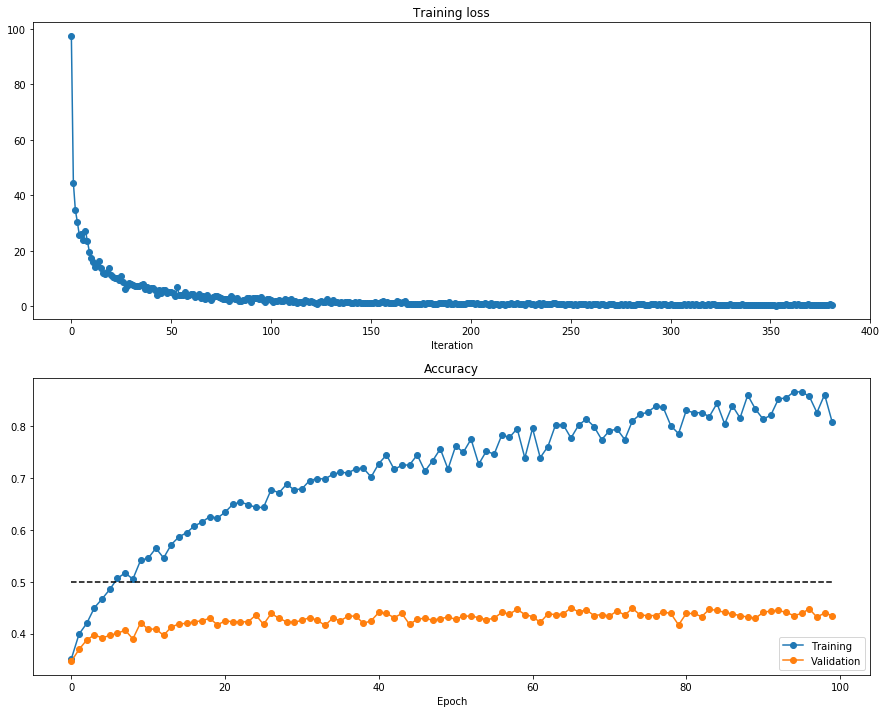

In [23]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section. Please complete the TODOs in the optim.py under lib directory.

## SGD + Momentum
The update rule of SGD plus momentum is as shown below: <br\ >
\begin{equation}
v_t: velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta) \\
\theta = \theta - v_t
\end{equation}
Complete the SGDM() function in optim.py

In [85]:
# SGD with momentum
model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

In [86]:
for i in model.net.layers:
    for k, v in i.params.items():
        print(k)

fc1_w
fc1_b
fc2_w
fc2_b


In [87]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print ('updated_w error: ', rel_error(updated_w, expected_updated_w))
print ('velocity error: ', rel_error(expected_velocity, velocity))

updated_w error:  8.88234703351e-09
velocity error:  4.26928774328e-09


Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.

Training with Vanilla SGD...
(Iteration 1 / 200) loss: 2.5331450901750783
(Epoch 1 / 5) Training Accuracy: 0.28375, Validation Accuracy: 0.271
(Epoch 2 / 5) Training Accuracy: 0.332, Validation Accuracy: 0.305
(Iteration 101 / 200) loss: 1.7853439008584373
(Epoch 3 / 5) Training Accuracy: 0.37475, Validation Accuracy: 0.325
(Epoch 4 / 5) Training Accuracy: 0.39325, Validation Accuracy: 0.333
(Epoch 5 / 5) Training Accuracy: 0.43425, Validation Accuracy: 0.358

Training with SGD plus Momentum...
(Iteration 1 / 200) loss: 2.8509400248282555
(Epoch 1 / 5) Training Accuracy: 0.31275, Validation Accuracy: 0.279
(Epoch 2 / 5) Training Accuracy: 0.378, Validation Accuracy: 0.322
(Iteration 101 / 200) loss: 1.7622089955919373
(Epoch 3 / 5) Training Accuracy: 0.41025, Validation Accuracy: 0.301
(Epoch 4 / 5) Training Accuracy: 0.4865, Validation Accuracy: 0.364
(Epoch 5 / 5) Training Accuracy: 0.45875, Validation Accuracy: 0.348


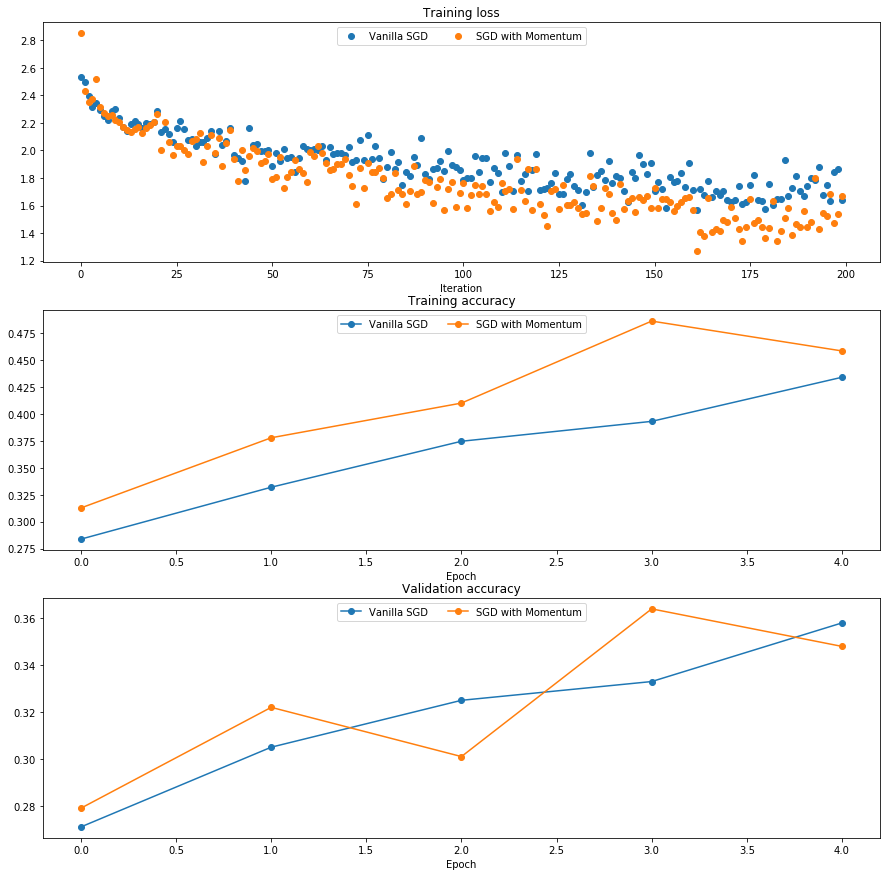

In [88]:
# Arrange a small data
num_train = 4000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

print ("Training with Vanilla SGD...")
results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with SGD plus Momentum...")
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## RMSProp
The update rule of RMSProp is as shown below: <br\ >
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}
Complete the RMSProp() function in optim.py

In [89]:
# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"]))

updated_w error:  9.50264522989e-08
cache error:  2.64779558072e-09


## Adam
The update rule of Adam is as shown below: <br\ >
\begin{equation}
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_1)g_t^2 \\
\hat{m_t}: bias\ corrected\ m_t \\
\hat{v_t}: bias\ corrected\ v_t \\
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v_t}}+\epsilon}
\end{equation}
Complete the Adam() function in optim.py

In [106]:
# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)
test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print ('updated_w error: ', rel_error(expected_updated_w, updated_w))
print ('mt error: ', rel_error(expected_m, mt))
print ('vt error: ', rel_error(expected_v, vt))

updated_w error:  1.13956917985e-07
mt error:  4.21496319311e-09
vt error:  4.20831403811e-09


## Comparing the optimizers
Run the following code block to compare the plotted results among all the above optimizers

Training with RMSProp...
(Iteration 1 / 200) loss: 2.39415752703503
(Epoch 1 / 5) Training Accuracy: 0.359, Validation Accuracy: 0.314
(Epoch 2 / 5) Training Accuracy: 0.43875, Validation Accuracy: 0.341
(Iteration 101 / 200) loss: 1.5090441882440628
(Epoch 3 / 5) Training Accuracy: 0.4975, Validation Accuracy: 0.368
(Epoch 4 / 5) Training Accuracy: 0.5615, Validation Accuracy: 0.388
(Epoch 5 / 5) Training Accuracy: 0.60775, Validation Accuracy: 0.401

Training with Adam...
(Iteration 1 / 200) loss: 2.6609346715221234
(Epoch 1 / 5) Training Accuracy: 0.37025, Validation Accuracy: 0.324
(Epoch 2 / 5) Training Accuracy: 0.4495, Validation Accuracy: 0.348
(Iteration 101 / 200) loss: 1.3820791038697149
(Epoch 3 / 5) Training Accuracy: 0.50925, Validation Accuracy: 0.346
(Epoch 4 / 5) Training Accuracy: 0.595, Validation Accuracy: 0.356
(Epoch 5 / 5) Training Accuracy: 0.647, Validation Accuracy: 0.376


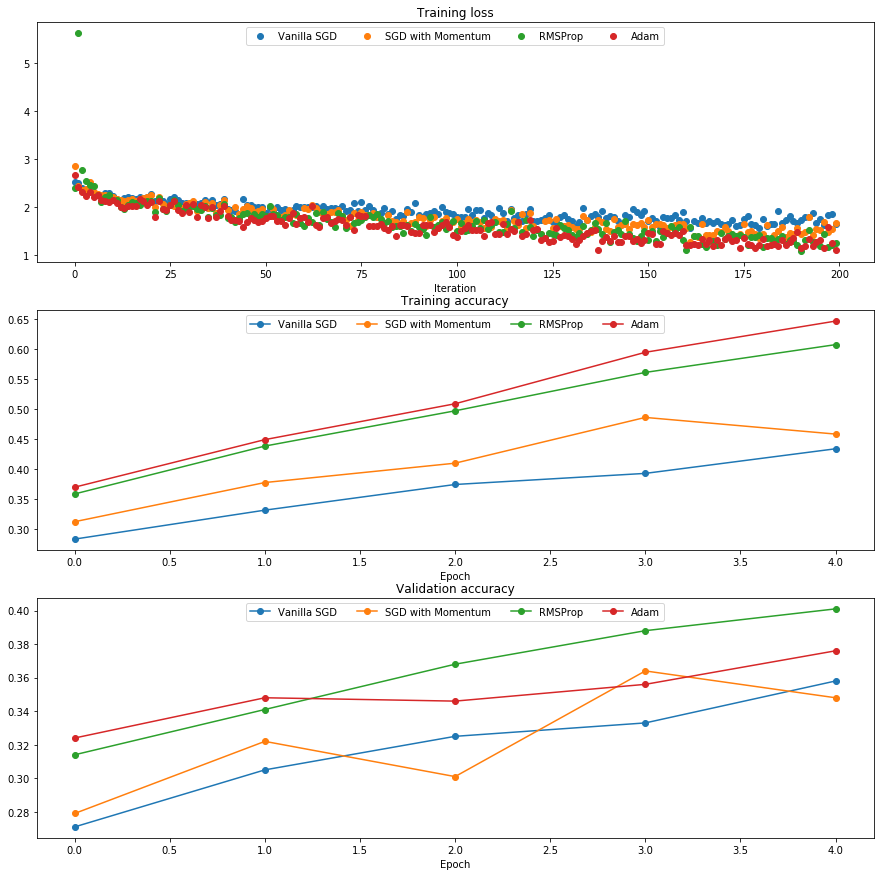

In [107]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print ("Training with RMSProp...")
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print ("\nTraining with Adam...")
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout
Run the following code blocks to compare the results with and without dropout

In [112]:
# Train two identical nets, one with dropout and one without
num_train = 500
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
dropout_ps = [0, 0.25]  # you can try some dropout prob yourself

results_dict = {}
for dropout_p in dropout_ps:
    results_dict[dropout_p] = {}

for dropout_p in dropout_ps:
    print ("Dropout =", dropout_p)
    model = DropoutNetTest(dropout_p=dropout_p)
    loss_f = cross_entropy()
    optimizer = SGDM(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=20, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[dropout_p] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

Dropout = 0
(Iteration 1 / 100) loss: 2.302585092994045
(Epoch 1 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 2 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 3 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 4 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 5 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 6 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 7 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 8 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 9 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 10 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 11 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 12 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 13 / 20) Training Accuracy: 0.092, Validation Accuracy: 0.112
(Epoch 14 / 20) Training Accuracy: 0.092, Validation Acc

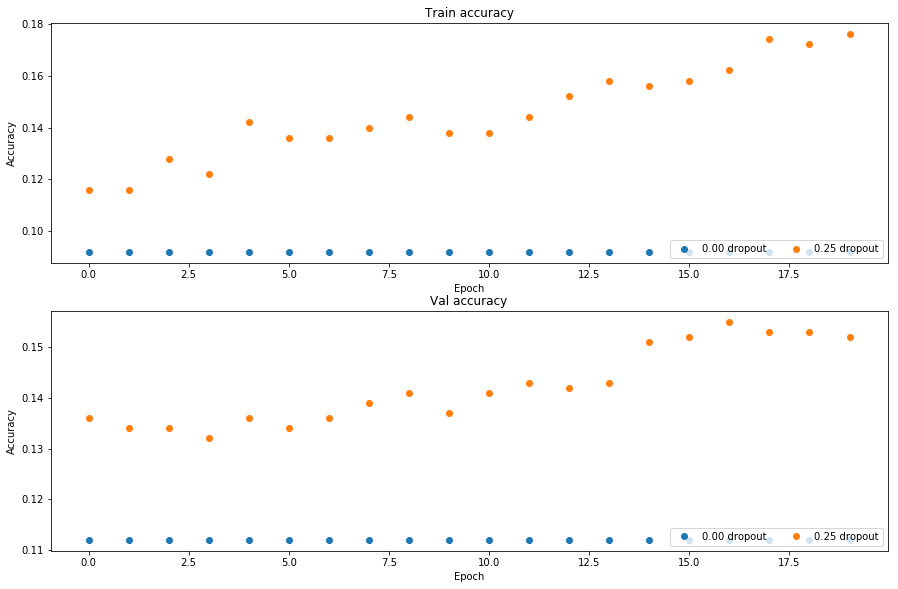

In [113]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % dropout_p)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % dropout_p)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Inline Question: Describe what you observe from the above results and graphs
#### Ans:

## Plot the Activation Functions
In each of the activation function, use the given lambda function template to plot their corresponding curves.

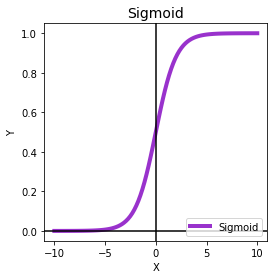

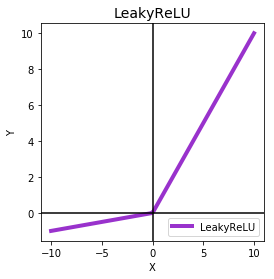

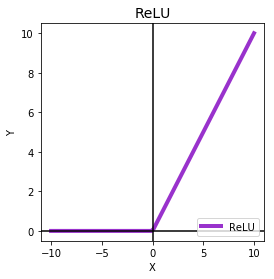

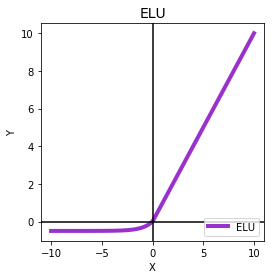

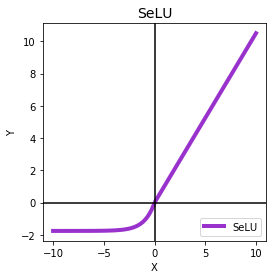

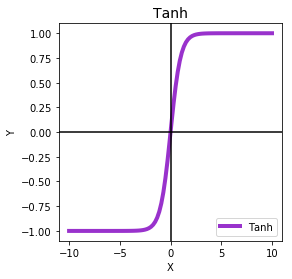

In [115]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
# sigmoid = lambda x: x
# leaky_relu = lambda x: x
# relu = lambda x: x
# elu = lambda x: x
# selu = lambda x: x
# tanh = lambda x: x
sigmoid = lambda x : 1/ (1+np.exp(-x))
leaky_relu = lambda x : np.maximum(alpha* x, x)
relu = lambda x : np.maximum(0, x)
elu = lambda x : np.where(x>0, x, elu_alpha*(np.exp(x)-1))
selu = lambda x : np.where(x>0, selu_scale * x, selu_scale * selu_alpha*(np.exp(x)-1))
tanh = lambda x : np.tanh(x)
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()

# Phew! You're done for problem 1 now, but 3 more to go... LOL